# SCC-ICMC-USP - 2º Semestre de 2024
## SCC-0275 - Introdução a Ciência de Dados
### Professora: Roseli A. F. Romero
###  

### **Exercício 4**

**Número do Grupo:**

**Alunos:**
1. Pedro Zenatte - 13676919
2. List item

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.

---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---

Após a análise dos dados e um pré-processamento, segue a etapa de modelagem dos experimentos. Essa etapa pode exigir um retorno ao pré-processamento, caso seja percebido que algo precisa ser ajustado. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, o experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com a ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Esta prática foca mais no processo de avaliação e não no modelamento em si, por isso vamos trabalhar com apenas dois tipos de classificadores. Para a avaliação, é necessário definir qual a função de custo/erro adequada e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado à escolha do algoritmo de classificação, bem como à escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Bibliotecas

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário e já vistas neste curso.


In [25]:
# Importação da base escolhida e transformação para problema binário caso necessário.

# BASE ESCOLHIDA: Câncer de mama - sklearn.datasets.load_breast_cancer

# Caminho exigido no enunciado (sem montar o Drive)
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/wdbc.data"

# Nomes de colunas do WDBC (UCI)
cols = (
    ["id", "diagnosis"] +
    [f"{name}_{stat}" for stat in ["mean","se","worst"] for name in [
        "radius","texture","perimeter","area","smoothness","compactness",
        "concavity","concave_points","symmetry","fractal_dimension"
    ]]
)

# Leitura
df = pd.read_csv(DATA_PATH, header=None, names=cols)

# Transformação para problema binário (já é) e limpeza de atributos
df = df.drop(columns=["id"])  # remover id (não preditiva)
df["target"] = df["diagnosis"].map({"M": 1, "B": 0}).astype(int)
df = df.drop(columns=["diagnosis"])

# Separação treino/teste estratificada (fixa para reprodutibilidade)
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Checagens úteis
print("Formas:", X_train.shape, X_test.shape)
print("Nulos (total):", int(df.isna().sum().sum()))
print("Proporção classes (0=benigno,1=maligno):")
print(y.value_counts(normalize=True).round(4))


Formas: (455, 30) (114, 30)
Nulos (total): 0
Proporção classes (0=benigno,1=maligno):
target
0    0.6274
1    0.3726
Name: proportion, dtype: float64


In [5]:
# Complete a função de pré-processamento.
def preprocess(x_treino, x_teste, y_treino, y_teste):
  """
  - Imputa valores faltantes com a mediana (robusto a outliers).
  - Padroniza as features (média=0, desvio=1).
  - Retorna arrays prontos para modelagem.
  """
  pipe = Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="median")),
      ("scaler", StandardScaler())
  ])
  x_treino_novo = pipe.fit_transform(x_treino)
  x_teste_novo  = pipe.transform(x_teste)

  # manter y como arrays para compatibilidade ampla
  y_treino_novo = np.asarray(y_treino)
  y_teste_novo  = np.asarray(y_teste)

  return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

In [6]:
# Exemplo de uso:
X_train_proc, X_test_proc, y_train_arr, y_test_arr = preprocess(X_train, X_test, y_train, y_test)
print("Depois do preprocess:", X_train_proc.shape, X_test_proc.shape)

Depois do preprocess: (455, 30) (114, 30)


A base WDBC apresenta diagnóstico binário, com a variável diagnosis transformada em target (M=1, B=0) e remoção do atributo id por não ser relevante. Os dados foram divididos em treino e teste de forma estratificada (80/20, random_state=42). O pré-processamento foi feito com imputação pela mediana e padronização via Pipeline, ajustado apenas no treino para evitar vazamento. As matrizes resultantes (X_train_proc e X_test_proc) ficaram prontas para os experimentos de avaliação posteriores.

---
### Questão 02.

Implemente a função que retorna a matriz de confusão, e crie funções para calcular as quatro métricas de avaliação, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [8]:
# Complete a função de cálculo da matriz de confusão.
def confusion_matrix(y_test, y_pred):
  """
    Retorna a matriz de confusão 2x2:
    [[TN, FP],
     [FN, TP]]
    onde:
      - TN = verdadeiros negativos
      - FP = falsos positivos
      - FN = falsos negativos
      - TP = verdadeiros positivos
  """
  conf = np.zeros((2, 2), dtype=int)
  for yt, yp in zip(y_test, y_pred):
    if yt == 1 and yp == 1:
        conf[1, 1] += 1  # TP
    elif yt == 0 and yp == 0:
        conf[0, 0] += 1  # TN
    elif yt == 0 and yp == 1:
        conf[0, 1] += 1  # FP
    elif yt == 1 and yp == 0:
        conf[1, 0] += 1  # FN
  return conf

In [9]:
# Demonstra o funcionamento da função confusion_matrix.
actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

conf_mat = confusion_matrix(actual, predicted)
print("Matriz de confusão (TN, FP / FN, TP):")
print(conf_mat)

Matriz de confusão (TN, FP / FN, TP):
[[1 3]
 [2 4]]


In [11]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 1.
# --------------------------------------------
# Métrica 1: Acurácia
# --------------------------------------------
def accuracy(conf_mat):
    TN, FP, FN, TP = conf_mat.ravel()
    m = (TP + TN) / (TP + TN + FP + FN)
    return round(m, 4)

m = accuracy(conf_mat)
print("Acurácia:", m)

Acurácia: 0.5


In [12]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 2.
# --------------------------------------------
# Métrica 2: Precisão (Precision / TVP)
# --------------------------------------------
def precision(conf_mat):
    TN, FP, FN, TP = conf_mat.ravel()
    m = TP / (TP + FP) if (TP + FP) != 0 else 0
    return round(m, 4)

m = precision(conf_mat)
print("Precisão:", m)

Precisão: 0.5714


In [13]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 3.
# --------------------------------------------
# Métrica 3: Revocação (Recall / Sensibilidade / TPR)
# --------------------------------------------
def recall(conf_mat):
    TN, FP, FN, TP = conf_mat.ravel()
    m = TP / (TP + FN) if (TP + FN) != 0 else 0
    return round(m, 4)

m = recall(conf_mat)
print("Revocação:", m)

Revocação: 0.6667


In [14]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 4.
# --------------------------------------------
# Métrica 4: Especificidade (Specificity / TNR)
# --------------------------------------------
def specificity(conf_mat):
    TN, FP, FN, TP = conf_mat.ravel()
    m = TN / (TN + FP) if (TN + FP) != 0 else 0
    return round(m, 4)

m = specificity(conf_mat)
print("Especificidade:", m)

Especificidade: 0.25


---
### Questão 03.

Complete e execute a função *classificacao* definida no notebook.

- Aplique validação cruzada
- Use sua função de pré-processamento
- Use suas métricas de avaliação

**ATENÇÃO:** utilizar o método ``sklearn.model_selection.KFold`` para realizar a amostragem solicitada. Prestem atenção nas dicas e complete o código onde foi solicitado.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np

def make_score_fn_from_conf(metric_fn):
    """
    metric_fn: função que recebe conf_mat e retorna escalar (ex.: accuracy(conf_mat))
    retorna score_fn(y_pred, y_true) no formato esperado pela 'classificacao'
    """
    def score_fn(y_pred, y_true):
        conf = confusion_matrix(y_true, y_pred)  # matriz [[TN, FP],[FN, TP]]
        return metric_fn(conf)
    return score_fn


def classificacao(
    data,
    columns,
    target,
    preproc_fn,
    score_fn,
    score_name,
    classifiers=['dt', 'knn'],
    folds=5, plot=True):
    """
    ## About
    ---------
    Executa classificação do conjunto de dados passado.

    ## Params
    ----------
    data : any array-like
        Conjunto de dados
    columns : List[int]
        Índice das colunas utilizadas no treinamento e teste
    target : int
        Índice da coluna alvo
    classifiers : List[str]
        Nomes dos classificadores pré-projetados a serem utilizados.
        Opções: 'knn', 'dt', 'rf', 'svm'
        Exemplo: ['knn', 'dt'] -> utiliza apenas knn e decision tree
    preproc_fn : function
        Faz o pré-processamento da base já separada em treino e teste
    score_fn : function
        A função que calcula a medida de desempenho desejada. Deve ser uma
        função que compara dois vetores, o primeiro vetor são os valores preditos
        pelo classificador, o segundo os rótulos reais
        Vide exemplo das funções em
        http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
        como por exemplo, sklearn.metrics.accuracy_score
        http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: str
        Uma string com o nome da medida de desempenho
    folds : int, opcional
        Número de folds na validação cruzada (padrão=5)
    plot : bool, opcional
        True para plotar os gráficos False para não plotar (padrão=True)

    ## Returns
    -------
    dict
        Dicionário com os classificadores treinados, as medidas de desempenho
        e matriz de confusão

    ### Notas
    -----
    Realiza a classificação em 4 modelos (KNN, Arvore de Decisão, Floresta Aleatória
    e SVM) utilizando validação cruzada com o número de folds especificado
    Plota o gráfico do desempenho selecionado para cada classificador utilizado.
    """
    # inicializa os modelos com os parâmetros solicitados
    knn = KNeighborsClassifier(n_neighbors=3)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=int(len(data)*0.1))
    svm = SVC(kernel='rbf', C=1.0, gamma='scale')

    clfs = [knn, dt, rf, svm]
    clfs_names = ['knn', 'dt', 'rf', 'svm']

    # filtra os classificadores a serem utilizados
    clfs = [c for c, name in zip(clfs, clfs_names) if name in classifiers]
    clfs_names = [name for name in clfs_names if name in classifiers]

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    # DICA: Utilizar o método sklearn.model_selection.KFold
    ####
    # Seu codigo aqui!
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    ####

    # itera para cada classificador fazendo treino e teste
    results = {name : [] for name in clfs_names}
    for c, c_name in zip(clfs, clfs_names):
        # para cada split
        for train_idx, test_idx in kf.split(data):
            # separa conjunto de treino e de teste
            # DICA: utilizar método straKFold.split() do objeto criado na preparação
            # da validação cruzada.
            ####
            # Seu codigo aqui!
            X_train = data.iloc[train_idx, columns]
            y_train = data.iloc[train_idx, target]
            X_test  = data.iloc[test_idx,  columns]
            y_test  = data.iloc[test_idx,  target]
            ####

            # preprocessamento
            # DICA: Chamar a função de pré-processamento previamente produzida (preproc_fn).
            ####
            # Seu codigo aqui!
            x_train, x_test, y_train_proc, y_test_proc = preproc_fn(X_train, X_test, y_train, y_test)
            ####

            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train_proc)

            # valores preditos pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test_proc)

            # realiza predição no conjunto de teste e salva o resultado
            # DICA: Chamar a função de avaliação previamente produzida (score_fn).
            # A métrica calculada deve ser armazenada em "resultado"
            ####
            # Seu codigo aqui!
            resultado = score_fn(y_pred, y_test)
            ####
            results[c_name].append(resultado)

    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names],
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()

    return {'results': results, 'clfs':clfs}

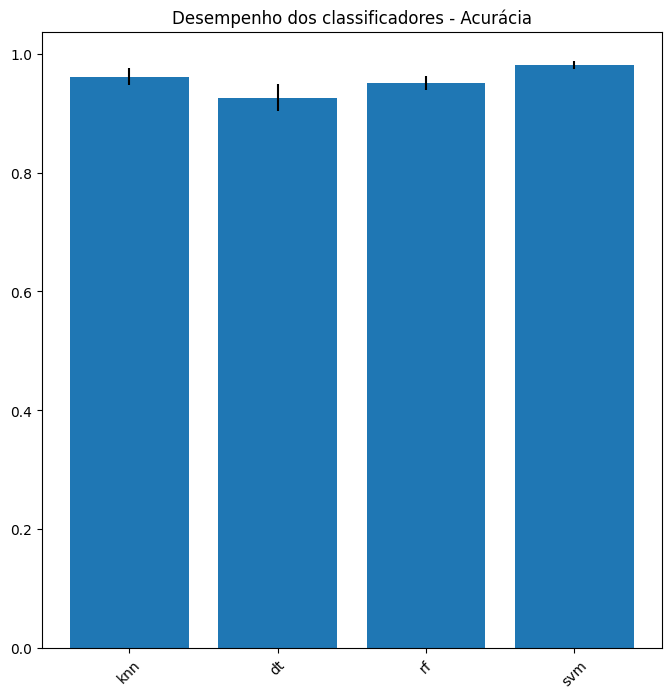


Desempenho dos classificadores - Acurácia
      Média  Desvio Padrão
knn  0.9613         0.0144
dt   0.9262         0.0233
rf   0.9508         0.0119
svm  0.9807         0.0066


In [28]:
# Exemplo: usar ACURÁCIA como score
score_fn = make_score_fn_from_conf(accuracy)  # troque por precision/recall/specificity se quiser
score_name = "Acurácia"

res = classificacao(
    data=df.reset_index(drop=True),
    columns=list(range(30)),
    target=30,
    preproc_fn=preprocess,
    score_fn=score_fn,
    score_name=score_name,
    classifiers=['dt','knn','rf','svm'],
    folds=5,
    plot=True
)

# Calcula média e desvio padrão e mostra como tabela
results_summary = {
    k: (np.mean(v), np.std(v)) for k, v in res['results'].items()
}

df_results = pd.DataFrame(results_summary, index=["Média", "Desvio Padrão"]).T
df_results = df_results.round(4)

print("\nDesempenho dos classificadores -", score_name)
print(df_results.to_string())


---

### Questão 04.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 2 procedimentos acima para estimar o desempenho.

> **DICA:** Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

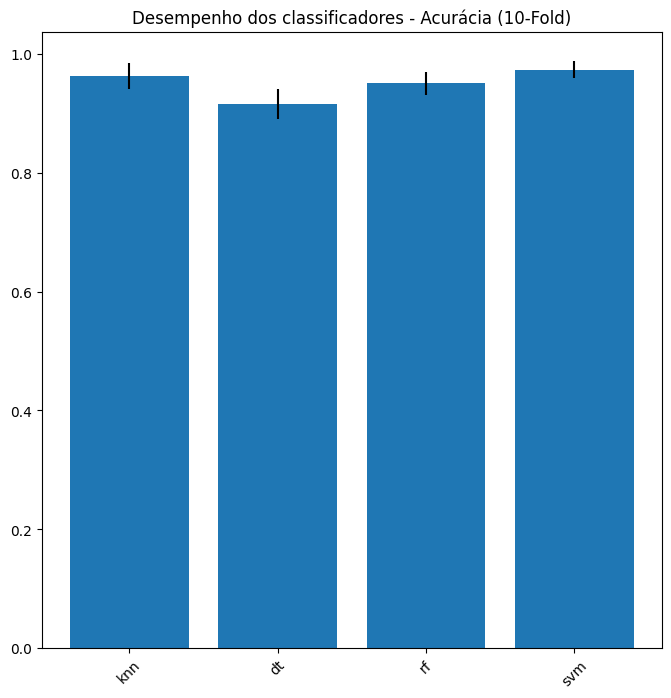

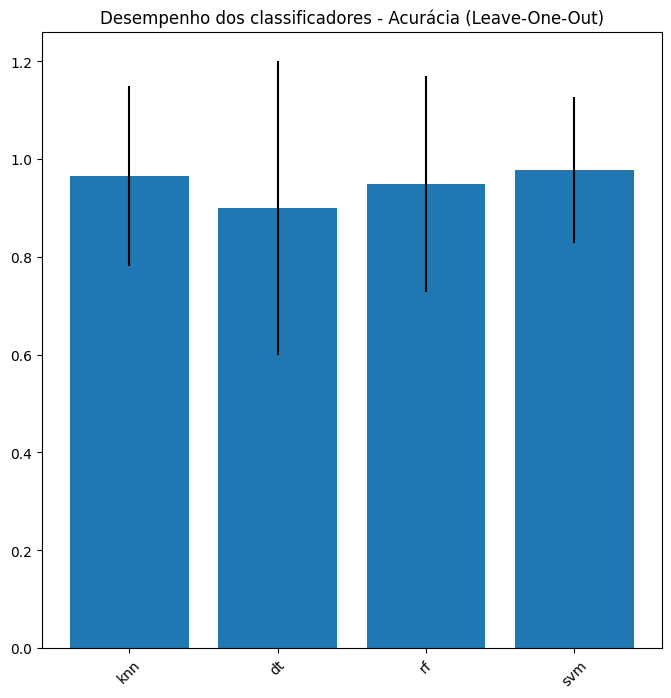


=== Desempenho - 10-Fold Cross-Validation ===
      Média  Desvio Padrão
knn  0.9631         0.0216
dt   0.9156         0.0247
rf   0.9507         0.0192
svm  0.9736         0.0142

=== Desempenho - Leave-One-Out ===
      Média  Desvio Padrão
knn  0.9649         0.1842
dt   0.8998         0.3002
rf   0.9490         0.2199
svm  0.9772         0.1494


In [24]:
# --- 10-Fold Cross-Validation ---
res_10fold = classificacao(
    data=df.reset_index(drop=True),
    columns=list(range(30)),
    target=30,
    preproc_fn=preprocess,
    score_fn=score_fn,
    score_name=score_name + " (10-Fold)",
    classifiers=['dt','knn','rf','svm'],
    folds=10,         # apenas muda o número de folds
    plot=True
)

# --- Leave-One-Out ---
res_loo = classificacao(
    data=df.reset_index(drop=True),
    columns=list(range(30)),
    target=30,
    preproc_fn=preprocess,
    score_fn=score_fn,
    score_name=score_name + " (Leave-One-Out)",
    classifiers=['dt','knn','rf','svm'],
    folds=len(df),    # equivalente a Leave-One-Out
    plot=True
)

# --- Exibir tabelas resumidas (usando a mesma lógica da questão anterior) ---
def resumo_resultados(res):
    results_summary = {k: (np.mean(v), np.std(v)) for k, v in res['results'].items()}
    df_results = pd.DataFrame(results_summary, index=["Média", "Desvio Padrão"]).T
    return df_results.round(4)

print("\n=== Desempenho - 10-Fold Cross-Validation ===")
print(resumo_resultados(res_10fold).to_string())

print("\n=== Desempenho - Leave-One-Out ===")
print(resumo_resultados(res_loo).to_string())
